In [7]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
airbnb = pd.read_csv('AB_NYC_2019.csv')

## Data Understanding

### Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file

The data set contains a total of 48,895 records and 16 attributes or features in the original data file. The latitude, longitude and reviews_per_month features are float type. The id, host_id, zip, price, minimum_nights, number_of_reviews, calculated_host_listings_count and availability_365 features are integer type. The name, host_name, neighborhood_group, neighborhood, room_type and last_review features are object type.

Features that add no value to the project will be removed through exploratory data analysis. Also, a number of additional features will be added and examined throughout the project stages. New features that add insight to the analysis will be retained.

In [9]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [9]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Are there other features that could be added to the data or created from existing features? Which ones? 

Multiple features were added in the first stage of the project. Zip codes were added to be used as a bridge to join features from other data sets. Additional features will be examined to provide further insight into the relationships between location, activity, supply and price. These include dist_subway, cnt_all, cnt_entire_home, cnt_private_room, cnt_shared_room, avgprice_entire_home, avgprice_private_room, and avgprice_shared_room. The features with names starting with 'cnt_' represent the count of listings for each room type within close proximity. Additionally, the features with names starting with 'avgprice_' represent the average price of listings within close proximity.

In [11]:
df1 = pd.read_csv("abnb_zip.csv")
df1.head()

,ID,LATITUDE,LONGITUDE,ZIP
0,2539,40.64749,-73.97237,11218.0
1,2595,40.75362,-73.98377,10036.0
2,3647,40.80902,-73.94190,10027.0
3,3831,40.68514,-73.95976,11238.0
4,5022,40.79851,-73.94399,10029.0


In [12]:
df2 = pd.read_csv("abnb_dist_subway.csv")
df2 = df2.rename(columns = {"Origin":"ID"})

df2.head()

,ID,Distance_Result
0,2539,0.243502
1,2595,0.053058
2,3647,0.191227
3,3831,0.250649
4,5022,0.110300


In [13]:
df3 = pd.read_csv("abnb_grid.csv")
df3 = df3.rename(columns = {"id":"ID"})
df3.head()

,ID,grid,cnt_all,cnt_entire_home,cnt_private_room,cnt_shared_room,avgprice_all,avgprice_entire_home,avgprice_private_room,avgprice_shared_room
0,2539,CM106,7,3,4,0,110.714286,141.666667,87.500000,0.000000
1,2595,CI68,21,17,4,0,258.904762,260.823529,250.750000,0.000000
2,3647,CU47,74,38,34,2,163.554054,221.736842,103.617647,77.000000
3,3831,CP93,43,32,11,0,132.906977,154.218750,70.909091,0.000000
4,5022,CT51,21,14,4,3,133.238095,159.214286,88.500000,71.666667


In [14]:
len(df1), len(df2), len(df3), 

(48895, 48895, 48895)

In [33]:
df_consolidated = pd.merge(pd.merge(df1, df2, on='ID'), df3, on = 'ID').drop(columns = ["grid", "LATITUDE", "LONGITUDE"])
df_consolidated = df_consolidated.rename(columns = {"Distance_Result":"dist_subway", "ID":"id"})

In [34]:
df_consolidated.head()

,id,ZIP,dist_subway,cnt_all,cnt_entire_home,cnt_private_room,cnt_shared_room,avgprice_all,avgprice_entire_home,avgprice_private_room,avgprice_shared_room
0,2539,11218.0,0.243502,7,3,4,0,110.714286,141.666667,87.500000,0.000000
1,2595,10036.0,0.053058,21,17,4,0,258.904762,260.823529,250.750000,0.000000
2,3647,10027.0,0.191227,74,38,34,2,163.554054,221.736842,103.617647,77.000000
3,3831,11238.0,0.250649,43,32,11,0,132.906977,154.218750,70.909091,0.000000
4,5022,10029.0,0.110300,21,14,4,3,133.238095,159.214286,88.500000,71.666667


In [36]:
ab_nyc = pd.merge(airbnb, df_consolidated, on = "id")
ab_nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,ZIP,dist_subway,cnt_all,cnt_entire_home,cnt_private_room,cnt_shared_room,avgprice_all,avgprice_entire_home,avgprice_private_room,avgprice_shared_room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,11218.0,0.243502,7,3,4,0,110.714286,141.666667,87.500000,0.000000
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,10036.0,0.053058,21,17,4,0,258.904762,260.823529,250.750000,0.000000
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,10027.0,0.191227,74,38,34,2,163.554054,221.736842,103.617647,77.000000
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,11238.0,0.250649,43,32,11,0,132.906977,154.218750,70.909091,0.000000
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,10029.0,0.110300,21,14,4,3,133.238095,159.214286,88.500000,71.666667


In [38]:
ab_nyc.to_csv("ABNB_NY_V2.csv")

## Exceptional Work

### You have free reign to provide additional analyses.
### One idea: implement dimensionality reduction, then visualize and interpret the results.

The latitude and longitude variables make it possible for high precision mapping of the individual rental units. Mapping provides a foundation for adding additional features with spatial reference (e.g. distance to subway station). Additionally, we have the opportunity to transform and create new variables from the existing data set. For example, a grid surface was overlaid throughout the study area to examine concentrations of rental units in close proximity to each other. Each individual grid cell encompasses an area of approximately 1M square feet. The features added for listing counts and average price were created from aggregating the original Airbnb listing data set by individual grid cell. A heat map of the study area provides insight on average sale price throughout the study area.

In [15]:
import matplotlib.image as mpimg

img=mpimg.imread('avgprice1.png')

### Heat Map of Average Listing Price in New York

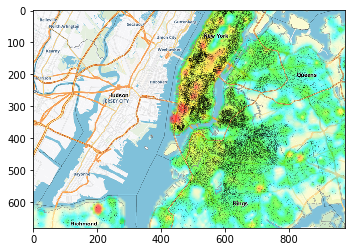

In [16]:
imgplot = plt.imshow(img)

Listings with higher average price are represented in several concentrated areas throughout Manhattan. Prices appear to be more moderate in the other boroughs of The Bronx, Brooklyn, Queens and Staten Island. A more granular view into each of these areas will provide more insight on the feature relationships.